In [1]:
import folium
import geopandas
import matplotlib
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import pandas as pd

Ler arquivos

In [33]:
londrina = geopandas.read_file('shapefile/bairros/LIM_Bairros_V1.shp')
lojas = pd.read_csv('Dados/coordenadas.csv')

Transformar dados

In [35]:
lista = []
listaNomes = []
listaClassifica = []
lojas['Classificação'] = lojas['Classificação'].str.strip('()')
lojas2 = pd.DataFrame([], columns = ['Nome', 'Classificação'])
for index, loja in lojas.iterrows():
    if loja['Longitude'] == 0.00000 or loja['Longitude'] < -51.35:
        #lista.append(Point(0,0))
        continue
    listaNomes.append(loja['Nome'])
    #valor = loja['Classificação'].replace('(', '')
    #print(valor)
    #valor = valor.replace(')', '')
    listaClassifica.append(float(loja['Classificação']))
    lista.append(Point(loja['Longitude'],loja['Latitude']))
    
lojas2['Nome'] = pd.Series(listaNomes)
lojas2['Classificação'] = pd.Series(listaClassifica)
lojas2['Classificação'].fillna(0, inplace=True)
plista = pd.DataFrame(lista)
glista = geopandas.GeoSeries(lista)
lojasLondrina = geopandas.GeoDataFrame(lojas2, geometry=glista)

/home/renan/anaconda3/envs/py3/lib/python3.8/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
<ipython-input-40-6d520865f61e>:12: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  ctx.add_basemap(ax,url=ctx.providers.Stamen.TonerLite)


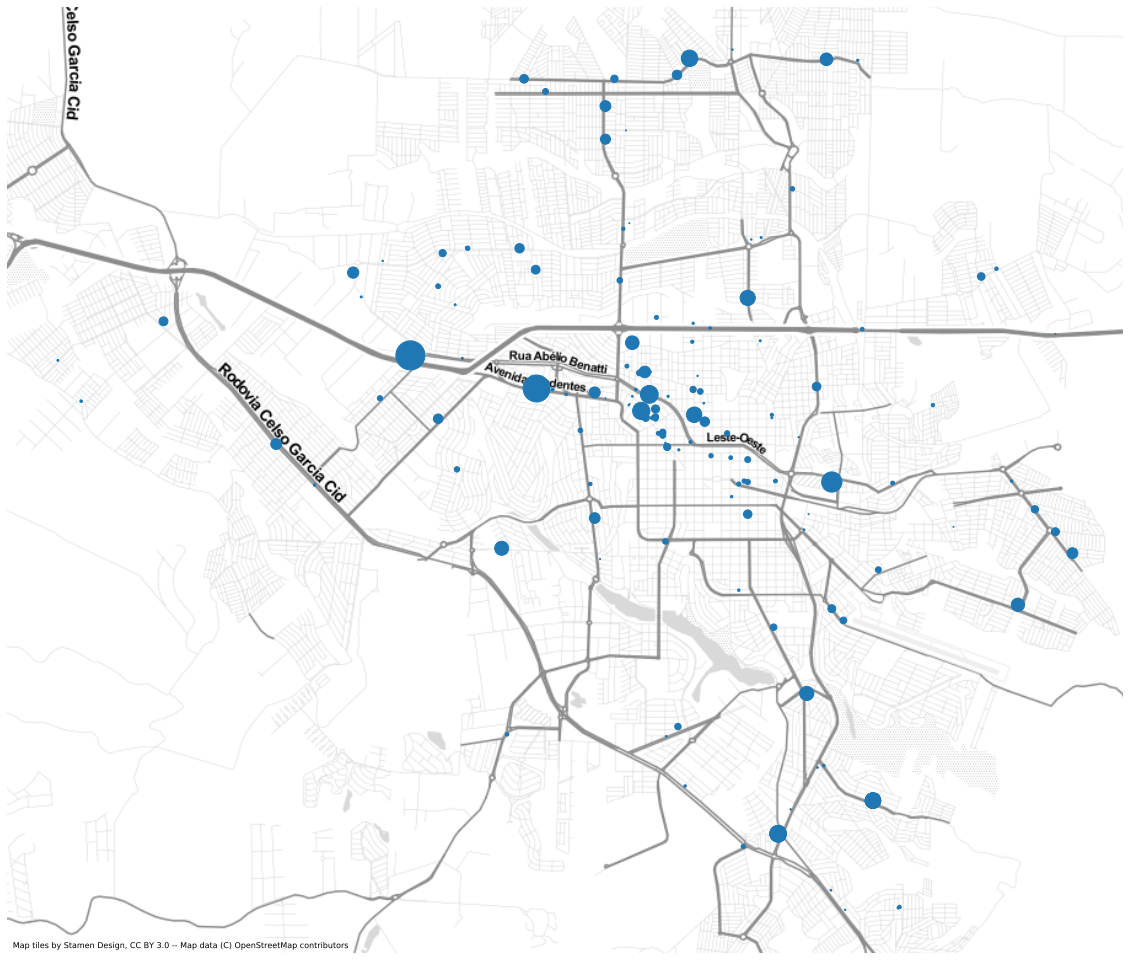

In [40]:
from geopandas import GeoDataFrame

#gdf = GeoDataFrame(glista, crs= {"init": "epsg:3857"}) # Create a georeferenced dataframe  
#gdf = gdf.to_crs(epsg=3857) # reproject it in Web mercator
lojasLondrina.crs = {'init' :'epsg:4326'}
df = lojasLondrina.to_crs(epsg=3857)
ax = df.plot(figsize=(20, 20),alpha=1.0,markersize=lojasLondrina['Classificação'])
#ax = df.plot(figsize=(20, 20))
#for x, y, label in zip(lojasLondrina.geometry.x, lojasLondrina.geometry.y, lojasLondrina.Nome):
#    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
# choose any of the supported maps from ctx.sources
ctx.add_basemap(ax,url=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()
plt.savefig('teste.png')
plt.show()

In [5]:
lojasLondrina

,Nome,Classificação,geometry
0,Espaço Smart,(26),POINT (-51.18442 -23.29995)
1,Depósito Roseira - Construção e Acabamentos,(235),POINT (-51.13779 -23.35333)
2,Depósito São Marcos,(317),POINT (-51.16904 -23.30120)
3,Depósito Alvorada - Materiais de Construção,(150),POINT (-51.14429 -23.25820)
4,Gol Materiais Para Construção,(12),POINT (-51.18892 -23.34483)
...,...,...,...
182,Z Casa & Cozinha,(19),POINT (-51.16042 -23.30908)
183,Mega Andaimes,(10),POINT (-51.16292 -23.30058)
184,Madeireira Casa Verde,(11),POINT (-51.17267 -23.27995)
185,"BUNKER - LOCAÇÃO CONTAINER LONDRINA, obras, re...",(3),POINT (-51.16667 -23.34508)


Limpar dados

In [66]:
lojas['Classificação'] = lojas['Classificação'].str.strip('()')
#map(float, lojas['Classificação'])
lojas['Classificação'].fillna(0, inplace=True)
list_of_floats = []

for item in lojas['Classificação'] :
    list_of_floats.append(float(item))

In [67]:
lojas2 = pd.DataFrame([], columns = ['Nome', 'Classificação'])
lojas2['Nome'] = pd.Series(lojas['Nome'])
lojas2['Classificação'] = pd.Series(list_of_floats)

In [81]:
lojas2

,Nome,Classificação
0,Espaço Smart,26.0
1,Depósito Roseira - Construção e Acabamentos,235.0
2,Depósito São Marcos,317.0
3,Depósito Alvorada - Materiais de Construção,150.0
4,Gol Materiais Para Construção,12.0
...,...,...
182,Z Casa & Cozinha,9.0
183,Mega Andaimes,1.0
184,Madeireira Casa Verde,32.0
185,"BUNKER - LOCAÇÃO CONTAINER LONDRINA, obras, re...",6.0


In [72]:
lojas3 = lojas2
glista2 = glista
for i in range(0,len(glista2)):
    if glista2.iloc[i].x == 0.0:
        lojas3.drop([i],inplace=True)
        glista2.drop([i],inplace=True)
lojas3

IndexError: single positional indexer is out-of-bounds

In [46]:
lojas2.drop([2])

,Nome,Classificação,geometry
0,Espaço Smart,26.0,POINT (-51.18442 -23.29995)
1,Depósito Roseira - Construção e Acabamentos,235.0,POINT (-51.13779 -23.35333)
3,Depósito Alvorada - Materiais de Construção,150.0,POINT (-51.14429 -23.25820)
4,Gol Materiais Para Construção,12.0,POINT (-51.18892 -23.34483)
5,Depósito de Materiais Casa & Construção,6.0,POINT (-51.16404 -23.35145)
...,...,...,...
201,Madeireira Casa Verde,11.0,POINT (-51.17267 -23.27995)
202,Madeireira Casa Verde,11.0,POINT (0.00000 0.00000)
203,"BUNKER - LOCAÇÃO CONTAINER LONDRINA, obras, re...",3.0,POINT (-51.16667 -23.34508)
204,"BUNKER - LOCAÇÃO CONTAINER LONDRINA, obras, re...",3.0,POINT (0.00000 0.00000)


In [29]:
lojasLondrina = geopandas.GeoDataFrame(lojas2)